In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
data = pd.read_csv('./data.csv', on_bad_lines='skip')
data = data.dropna(subset=['password'])
data.head(10)

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
5,AVYq1lDE4MgAZfNt,2
6,u6c8vhow,1
7,v1118714,1
8,universe2908,1
9,as326159,1


In [4]:
def extract_features(password: str):
    features = {
        'length': len(password),
        'uppercase': sum(1 for char in password if char.isupper()),
        'lowercase': sum(1 for char in password if char.islower()),
        'digits': sum(1 for char in password if char.isdigit()),
        'special_chars': sum(1 for char in password if not char.isalnum())
    }
    return features

In [5]:
features_df = pd.DataFrame([{'password': data['password'].iloc[i], 'strength': data['strength'].iloc[i], **extract_features(data['password'].iloc[i])} for i in range(len(data))])
features_df.head(10)

,password,strength,length,uppercase,lowercase,digits,special_chars
0,kzde5577,1,8,0,4,4,0
1,kino3434,1,8,0,4,4,0
2,visi7k1yr,1,9,0,7,2,0
3,megzy123,1,8,0,5,3,0
4,lamborghin1,1,11,0,10,1,0
5,AVYq1lDE4MgAZfNt,2,16,9,5,2,0
6,u6c8vhow,1,8,0,6,2,0
7,v1118714,1,8,0,1,7,0
8,universe2908,1,12,0,8,4,0
9,as326159,1,8,0,2,6,0


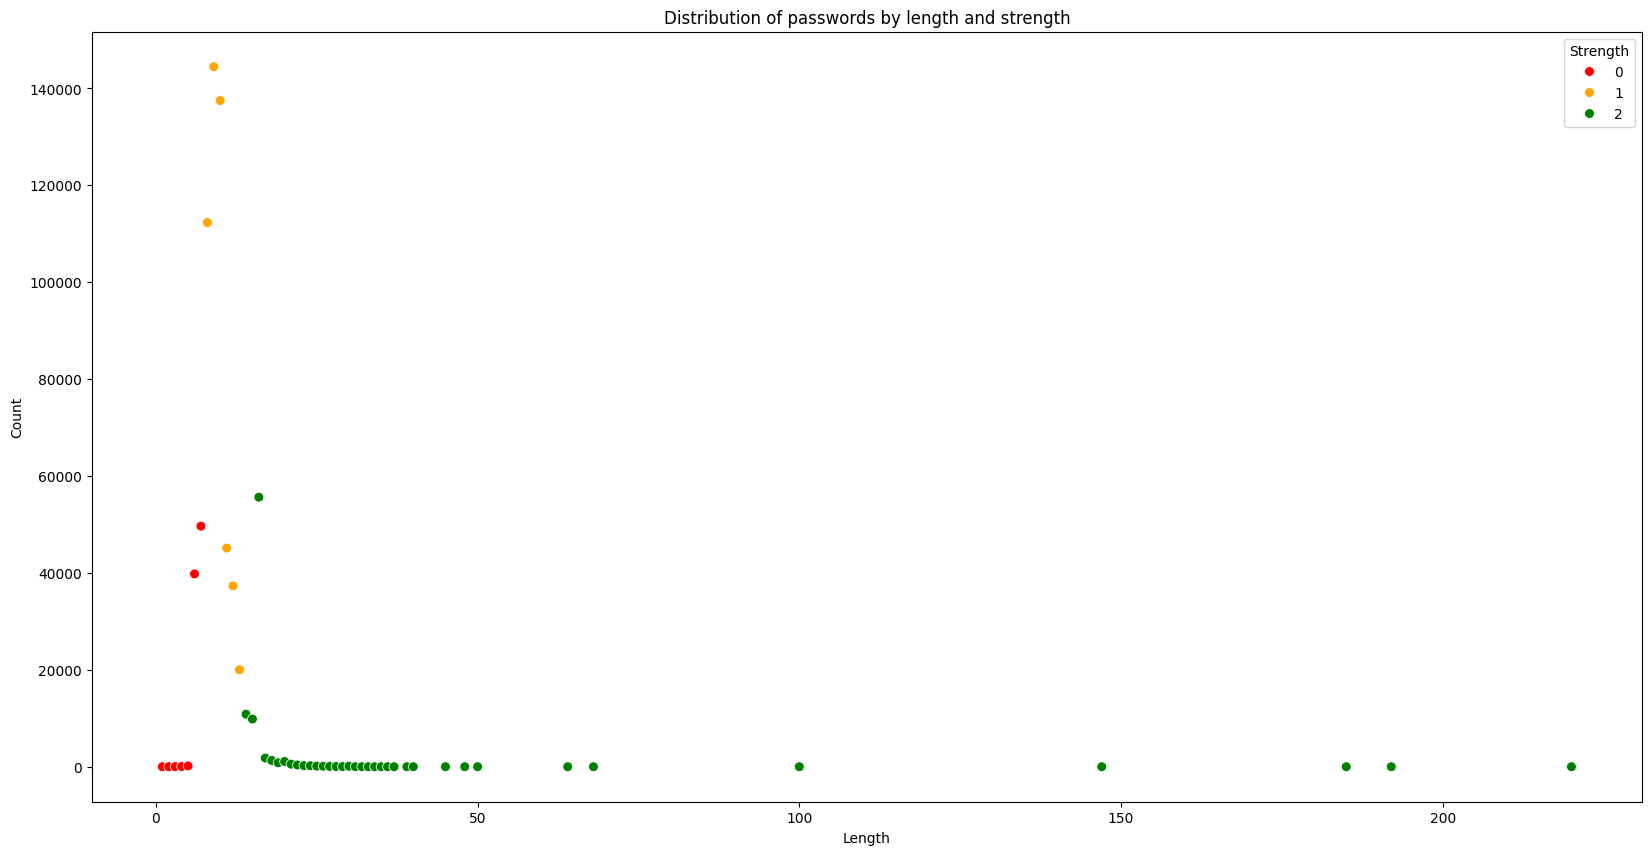

In [6]:
length_counts = features_df.groupby(['length', 'strength']).size().reset_index(name='count')
strength_palette = {
    0: "red",      # easy
    1: "orange",   # mediocre
    2: "green"     # strong
}

plt.figure(figsize=(20, 10))
sns.scatterplot(data=length_counts, x='length', y='count', hue='strength', palette=strength_palette, s=50)
plt.title('Distribution of passwords by length and strength')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend(title='Strength')
plt.show()

In [7]:
X = features_df[['length', 'uppercase', 'lowercase', 'digits', 'special_chars']]
y = features_df['strength']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928



In [10]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928



In [11]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928



In [12]:
ensemble_model = VotingClassifier(estimators=[
    ('lr', lr_model),
    ('dt', dt_model),
    ('rf', rf_model)
], voting='soft')

ensemble_model.fit(X_train, y_train)

# Training
ensemble_pred = ensemble_model.predict(X_test)

# Results
print("Ensemble:")
print(classification_report(y_test, ensemble_pred))

Ensemble:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928



In [13]:
train_accuracies = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Ensemble"],
    "Train Accuracy": [
        accuracy_score(y_train, lr_model.predict(X_train)),
        accuracy_score(y_train, dt_model.predict(X_train)),
        accuracy_score(y_train, rf_model.predict(X_train)),
        accuracy_score(y_train, ensemble_model.predict(X_train))
    ],
    "Validation Accuracy": [
        accuracy_score(y_test, lr_model.predict(X_test)),
        accuracy_score(y_test, dt_model.predict(X_test)),
        accuracy_score(y_test, rf_model.predict(X_test)),
        accuracy_score(y_test, ensemble_model.predict(X_test))
    ]
}

accuracy_df = pd.DataFrame(train_accuracies)
accuracy_df.head(4)

,Model,Train Accuracy,Validation Accuracy
0,Logistic Regression,1.0,1.0
1,Decision Tree,1.0,1.0
2,Random Forest,1.0,1.0
3,Ensemble,1.0,1.0


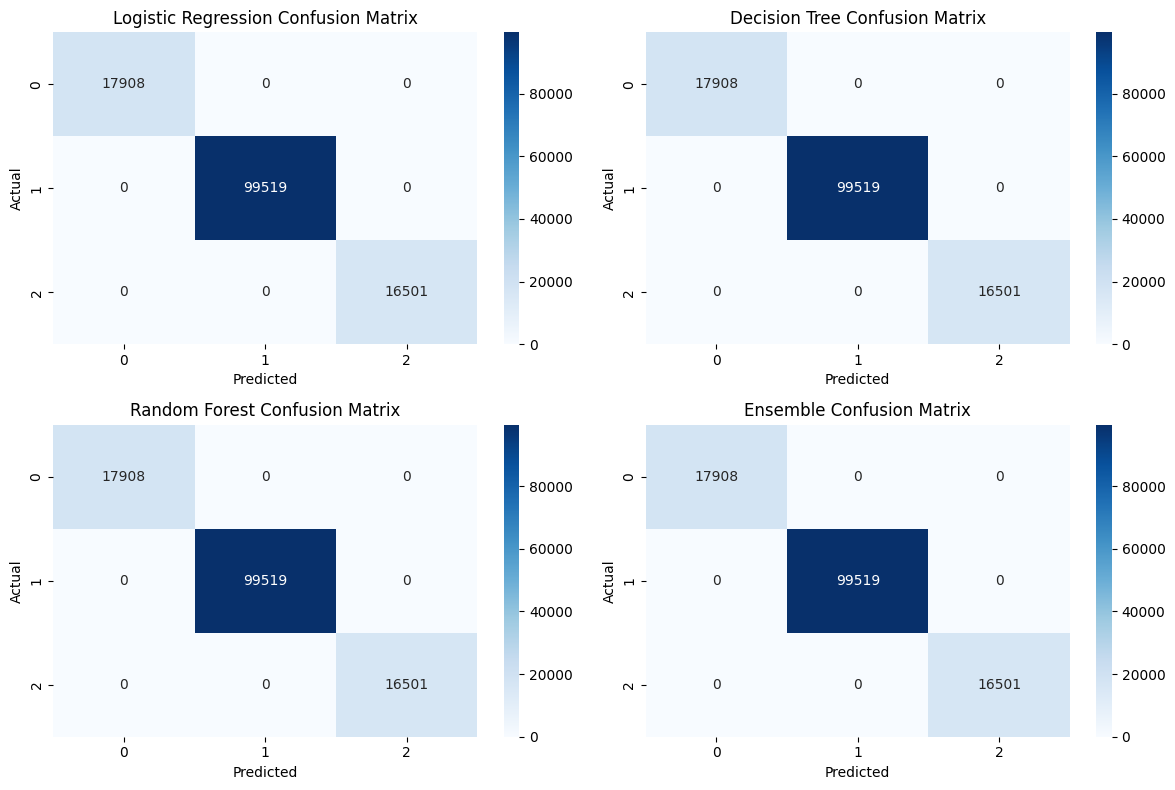

In [14]:
models = [("Logistic Regression", lr_model), ("Decision Tree", dt_model),
          ("Random Forest", rf_model), ("Ensemble", ensemble_model)]

plt.figure(figsize=(12, 8))
for i, (name, model) in enumerate(models, 1):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

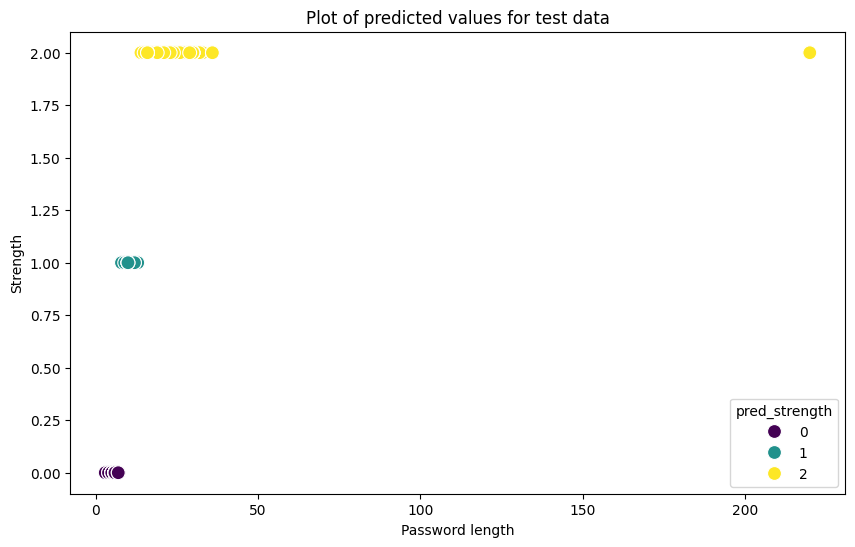

In [15]:
X_test_with_strength = X_test.copy()  # Copy X_test
X_test_with_strength['strength'] = y_test  # Adding true "strength"

# Predicted values by Ensemble model
X_test_with_strength['pred_strength'] = ensemble_model.predict(X_test)

# Побудова графіка
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_test_with_strength, x="length", y="strength", hue="pred_strength", palette="viridis", s=100)
plt.title("Plot of predicted values for test data")
plt.xlabel("Password length")
plt.ylabel("Strength")
plt.show()

In [18]:
your_password = "Supawitadmin123" # type-in the password here
your_features = extract_features(your_password)
your_features_df = pd.DataFrame([your_features])

# Predictions of the models
predictions = pd.DataFrame({
    "your_password": [your_password],
    'lr': [lr_model.predict(your_features_df)[0]],      # Logistic Regression
    'dt': [dt_model.predict(your_features_df)[0]],      # Decision Tree
    'fr': [rf_model.predict(your_features_df)[0]],      # Random Forest
    'en': [ensemble_model.predict(your_features_df)[0]] # Ensemble Model
})

predictions.head()

,your_password,lr,dt,fr,en
0,Supawitadmin123,2,2,2,2


In [19]:
import joblib

# บันทึกโมเดล (ตัวอย่างใช้ Logistic Regression)
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(ensemble_model, 'ensemble_model.pkl')

['ensemble_model.pkl']